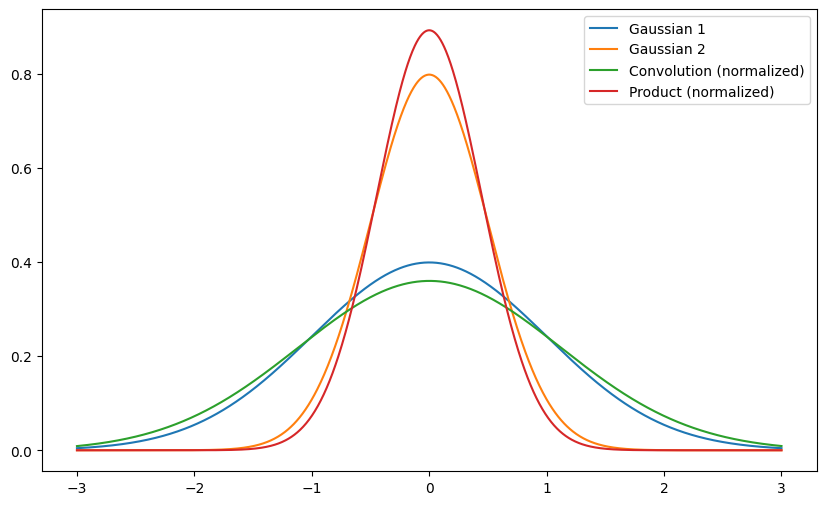

In [1]:
# convolution between two gaussian functions

import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / (sig * np.sqrt(2 * np.pi))

# Create an array of x values
x_values = np.linspace(-3, 3, 1200)

# Create two Gaussian functions
gaussian1 = gaussian(x_values, 0.0, 1.0)
gaussian2 = gaussian(x_values, 0.0, 0.5)

# Perform the convolution
convolution = np.convolve(gaussian1, gaussian2[::-1], mode='same')
convolution_after_norm = convolution / (np.sum(convolution) * (x_values[1] - x_values[0]))

product = gaussian1 * gaussian2
product_after_norm = product / (np.sum(product) * (x_values[1] - x_values[0]))

# Plot the two Gaussian functions and their convolution
plt.figure(figsize=(10, 6))
plt.plot(x_values, gaussian1, label='Gaussian 1')
plt.plot(x_values, gaussian2, label='Gaussian 2')
# plt.plot(x_values, convolution, label='Convolution')
plt.plot(x_values, convolution_after_norm, label='Convolution (normalized)')
# plt.plot(x_values, product, label='Product')
plt.plot(x_values, product_after_norm, label='Product (normalized)')
# plt.yscale('log')
plt.legend()
plt.show()

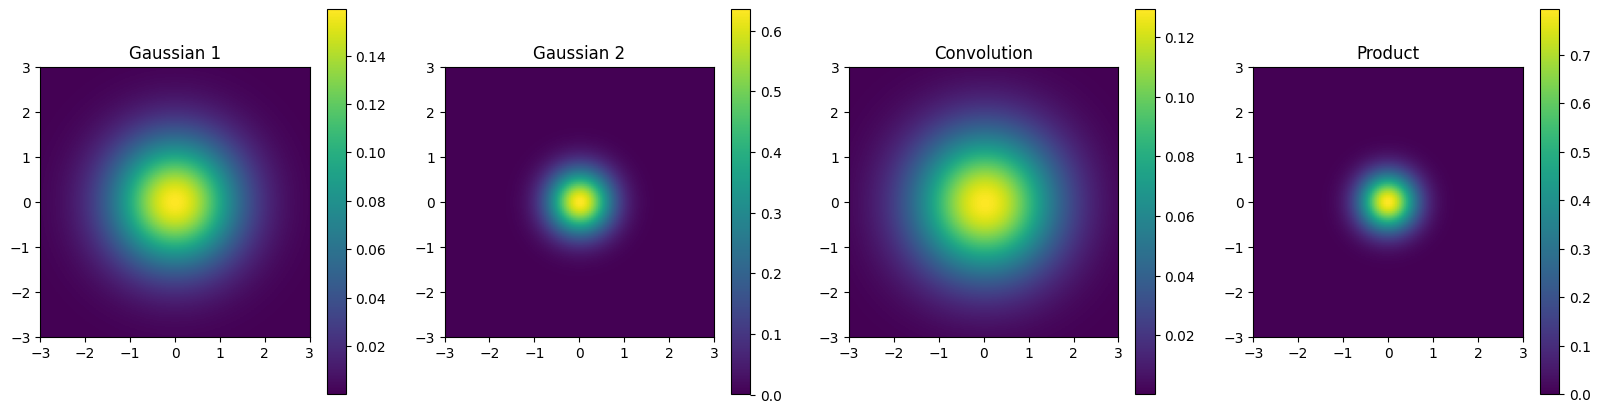

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Define the 2D Gaussian function
def gaussian2d(x, y, mu_x, mu_y, sig_x, sig_y):
    return (np.exp(-((x - mu_x)**2 / (2 * sig_x**2) + (y - mu_y)**2 / (2 * sig_y**2))) 
            / (2 * np.pi * sig_x * sig_y))

# Create a grid of x and y values
x_values = np.linspace(-3, 3, 120)
y_values = np.linspace(-3, 3, 120)
x, y = np.meshgrid(x_values, y_values)

# Create two 2D Gaussian functions
gaussian1 = gaussian2d(x, y, 0.0, 0.0, 1.0, 1.0)
gaussian2 = gaussian2d(x, y, 0.0, 0.0, 0.5, 0.5)

# Perform the 2D convolution
convolution = convolve2d(gaussian1, gaussian2, mode='same')

# Normalize the convolution
convolution /= np.sum(convolution) * (x_values[1] - x_values[0]) * (y_values[1] - y_values[0])

# perform the product
product = gaussian1 * gaussian2

# Normalize the product
product /= np.sum(product) * (x_values[1] - x_values[0]) * (y_values[1] - y_values[0])

# Plot the two 2D Gaussian functions and their convolution
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

c1 = ax[0].imshow(gaussian1, extent=[-3, 3, -3, 3])
fig.colorbar(c1, ax=ax[0])
ax[0].set_title('Gaussian 1')

c2 = ax[1].imshow(gaussian2, extent=[-3, 3, -3, 3])
fig.colorbar(c2, ax=ax[1])
ax[1].set_title('Gaussian 2')

c3 = ax[2].imshow(convolution, extent=[-3, 3, -3, 3])
fig.colorbar(c3, ax=ax[2])
ax[2].set_title('Convolution')

c4 = ax[3].imshow(product, extent=[-3, 3, -3, 3])
fig.colorbar(c4, ax=ax[3])
ax[3].set_title('Product')

plt.show()

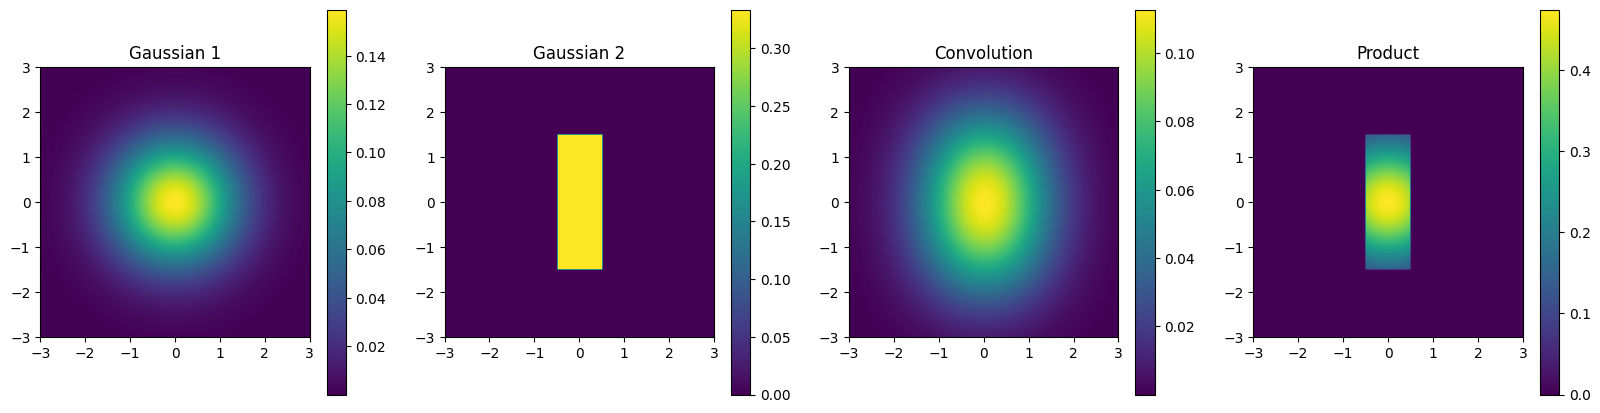

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Define the 2D Gaussian function
def gaussian2d(x, y, mu_x, mu_y, sig_x, sig_y):
    return (np.exp(-((x - mu_x)**2 / (2 * sig_x**2) + (y - mu_y)**2 / (2 * sig_y**2))) 
            / (2 * np.pi * sig_x * sig_y))

def uniform2d(x, y, mu_x, mu_y, sig_x, sig_y):
    is_in_bound = (np.abs(x - mu_x) < sig_x) & (np.abs(y - mu_y) < sig_y)
    result = np.zeros_like(x) + is_in_bound * 1 / (2 * sig_x * 2 * sig_y)
    return result

# Create a grid of x and y values
x_values = np.linspace(-3, 3, 120)
y_values = np.linspace(-3, 3, 120)
x, y = np.meshgrid(x_values, y_values)

# Create two 2D Gaussian functions
gaussian1 = gaussian2d(x, y, 0.0, 0.0, 1.0, 1.0)
uniform1 = uniform2d(x, y, 0.0, 0.0, 0.5, 1.5)

# Perform the 2D convolution
convolution = convolve2d(gaussian1, uniform1, mode='same')

# Normalize the convolution
convolution /= np.sum(convolution) * (x_values[1] - x_values[0]) * (y_values[1] - y_values[0])

# perform the product
product = gaussian1 * uniform1

# Normalize the product
product /= np.sum(product) * (x_values[1] - x_values[0]) * (y_values[1] - y_values[0])

# Plot the two 2D Gaussian functions and their convolution
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

c1 = ax[0].imshow(gaussian1, extent=[-3, 3, -3, 3])
fig.colorbar(c1, ax=ax[0])
ax[0].set_title('Gaussian 1')

c2 = ax[1].imshow(uniform1, extent=[-3, 3, -3, 3])
fig.colorbar(c2, ax=ax[1])
ax[1].set_title('Gaussian 2')

c3 = ax[2].imshow(convolution, extent=[-3, 3, -3, 3])
fig.colorbar(c3, ax=ax[2])
ax[2].set_title('Convolution')

c4 = ax[3].imshow(product, extent=[-3, 3, -3, 3])
fig.colorbar(c4, ax=ax[3])
ax[3].set_title('Product')

plt.show()

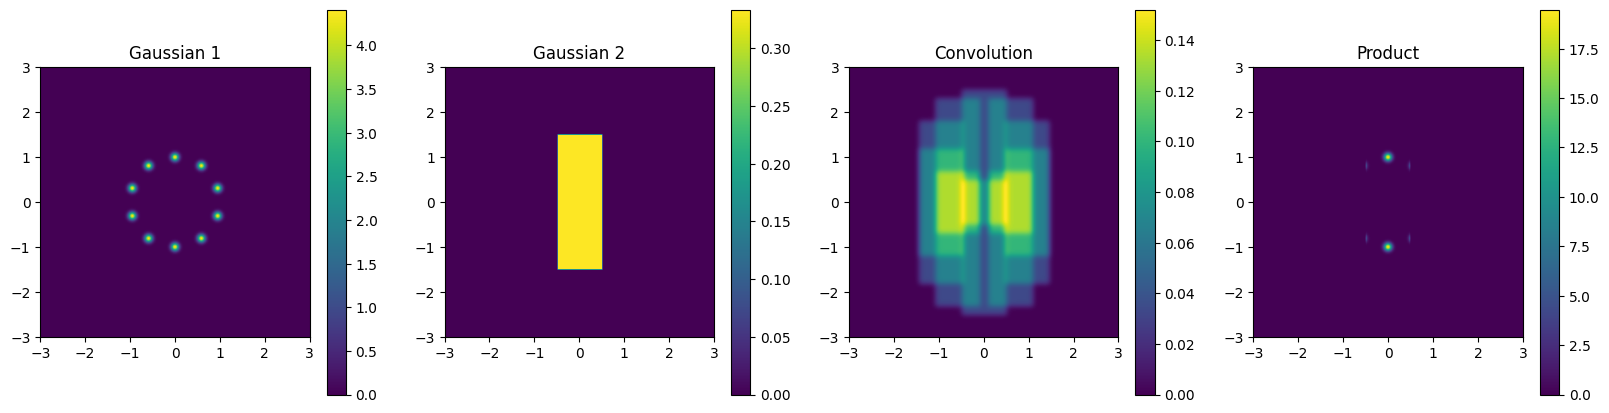

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Define the 2D Gaussian function
def gaussian2d(x, y, mus_x, mus_y, sig_x, sig_y):
    result = 0
    for mu_x, mu_y in zip(mus_x, mus_y):
     result += (np.exp(-((x - mu_x)**2 / (2 * sig_x**2) + (y - mu_y)**2 / (2 * sig_y**2))) 
            / (2 * np.pi * sig_x * sig_y))
    result /= len(mus_x)
    return result

def uniform2d(x, y, mu_x, mu_y, sig_x, sig_y):
    is_in_bound = (np.abs(x - mu_x) < sig_x) & (np.abs(y - mu_y) < sig_y)
    result = np.zeros_like(x) + is_in_bound * 1 / (2 * sig_x * 2 * sig_y)
    return result

# Create a grid of x and y values
x_values = np.linspace(-3, 3, 400)
y_values = np.linspace(-3, 3, 400)
x, y = np.meshgrid(x_values, y_values)

# Create two 2D Gaussian functions
gaussian1 = gaussian2d(x, y, np.sin(np.linspace(0, 2 * np.pi, 10, endpoint=False)), np.cos(np.linspace(0, 2 * np.pi, 10, endpoint=False)), 0.06, 0.06)
uniform1 = uniform2d(x, y, 0.0, 0.0, 0.5, 1.5)

# Perform the 2D convolution
convolution = convolve2d(gaussian1, uniform1, mode='same')

# Normalize the convolution
convolution /= np.sum(convolution) * (x_values[1] - x_values[0]) * (y_values[1] - y_values[0])

# perform the product
product = gaussian1 * uniform1

# Normalize the product
product /= np.sum(product) * (x_values[1] - x_values[0]) * (y_values[1] - y_values[0])

# Plot the two 2D Gaussian functions and their convolution
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

c1 = ax[0].imshow(gaussian1, extent=[-3, 3, -3, 3])
fig.colorbar(c1, ax=ax[0])
ax[0].set_title('Gaussian 1')

c2 = ax[1].imshow(uniform1, extent=[-3, 3, -3, 3])
fig.colorbar(c2, ax=ax[1])
ax[1].set_title('Gaussian 2')

c3 = ax[2].imshow(convolution, extent=[-3, 3, -3, 3])
fig.colorbar(c3, ax=ax[2])
ax[2].set_title('Convolution')

c4 = ax[3].imshow(product, extent=[-3, 3, -3, 3])
fig.colorbar(c4, ax=ax[3])
ax[3].set_title('Product')

plt.show()